In [29]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [18]:
# Define the MLP model
# The super() function should be called to initialize the parent class, and it should not be used to call the __init__ method.
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(256, 128) # Hidden Layer with 128 neurons
        self.fc2 = nn.Linear(128, 3) # Output Layer with 3 neurons (3 classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # ReLU activation for the hidden layer
        x = torch.softmax(self.fc2(x), dim=1) # Softmax activation for the output layer
        return x



In [20]:
# with the help of chat GPT:
def load_image(image_file):
    img = Image.open(image_file)
    # Resize the image to 8x8
    img = img.resize((8, 8))
    # Convert the image to a tensor and flatten it into a 1D array
    img_tensor = transforms.ToTensor()(img).view(256)
    return img_tensor

image_files = ["Q5_1.png", "Q5_2.png", "Q5_3.png"]

# Load and preprocess the images
image_data = [load_image(image_file) for image_file in image_files]
labels = [0, 1, 2]

train_data = image_data
train_labels = labels
test_data = image_data
test_labels = labels


In [28]:
model = SimpleMLP()

criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

#these numbers are custom
num_epochs = 100
batch_size = 3  # Since we have three images
train_loss_values = []

#Training
for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize loss for this epoch
    for i in range(0, len(train_data), batch_size):
        inputs = torch.stack(train_data[i:i+batch_size])
        labels = torch.tensor(train_labels[i:i+batch_size])

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss

        loss.backward()  # Backpropagation for optimizing
        optimizer.step()  # Update the model's parameters
        epoch_loss += loss.item()

    # Calculate the average loss for this epoch
    avg_epoch_loss = epoch_loss / len(train_data)
    train_loss_values.append(avg_epoch_loss)  # Append to the list
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()}")


# Testing
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(test_data)):
        inputs = test_data[i].unsqueeze(0)  # Convert a single image to a 1-sample batch
        labels = test_labels[i]

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += 1
        if predicted == labels:
            correct += 1

print("--------------------------------------------")
print(f"Accuracy on test data: {100 * correct / total}%")

Epoch [1/100] - Loss: 1.10541570186615
Epoch [2/100] - Loss: 1.1038767099380493
Epoch [3/100] - Loss: 1.1025326251983643
Epoch [4/100] - Loss: 1.101553201675415
Epoch [5/100] - Loss: 1.100767970085144
Epoch [6/100] - Loss: 1.100049614906311
Epoch [7/100] - Loss: 1.0993293523788452
Epoch [8/100] - Loss: 1.0986448526382446
Epoch [9/100] - Loss: 1.0979958772659302
Epoch [10/100] - Loss: 1.0974016189575195
Epoch [11/100] - Loss: 1.0968527793884277
Epoch [12/100] - Loss: 1.0962334871292114
Epoch [13/100] - Loss: 1.095621109008789
Epoch [14/100] - Loss: 1.095030426979065
Epoch [15/100] - Loss: 1.0944331884384155
Epoch [16/100] - Loss: 1.093700647354126
Epoch [17/100] - Loss: 1.092957615852356
Epoch [18/100] - Loss: 1.0922226905822754
Epoch [19/100] - Loss: 1.0915024280548096
Epoch [20/100] - Loss: 1.090773105621338
Epoch [21/100] - Loss: 1.0900579690933228
Epoch [22/100] - Loss: 1.0893398523330688
Epoch [23/100] - Loss: 1.0886216163635254
Epoch [24/100] - Loss: 1.0880707502365112
Epoch [25/1

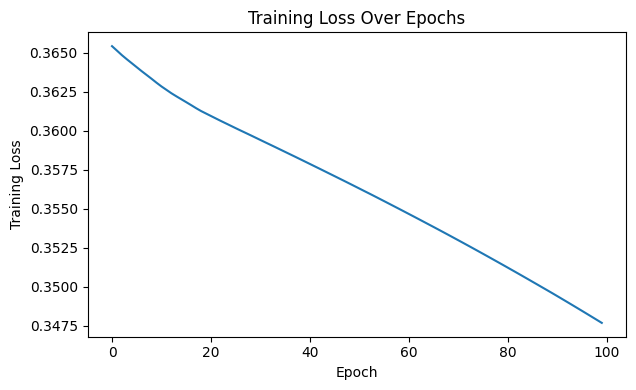

In [24]:
# Plot the training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_values)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")

plt.tight_layout()
plt.show()